## **LABORATORIO N°3**

## Grupo N°6
- Gutierrez Coronado Matias Ezequiel
- Flores Medina Erik Daniel
- Minto Arze Javier Diego
- Arriaga Ortiz Erika Judith

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Punto 1.


### **Consigna**

- Modificar el generador de dataset aleatorio, para que este pueda generar centroides en cantidades entre 1 y 20, y considerando una importante distancia entre ellos con la finalidad de permitir la verificación visual una vez se realice el entrenamiento del modelo.
- Modificar y adecuar todos los códigos para su respectivo aplicación y demostración de la efectividad del modelo KMeans, metodo del codo y silhouette score.

In [253]:
from sklearn.datasets import make_blobs
import numpy as np

n_samples = 24000
n_features = 22
n_centroids = np.random.randint(15, 20)
np.random.seed(7)

blob_centers = np.random.rand(n_centroids, n_features) * 50
blob_std = np.random.uniform(1.5, 3.0, n_centroids)

X, y = make_blobs(n_samples=n_samples,
                  centers=blob_centers,
                  cluster_std=blob_std,
                  random_state=7)

In [254]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_2D = pca.fit_transform(X)

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

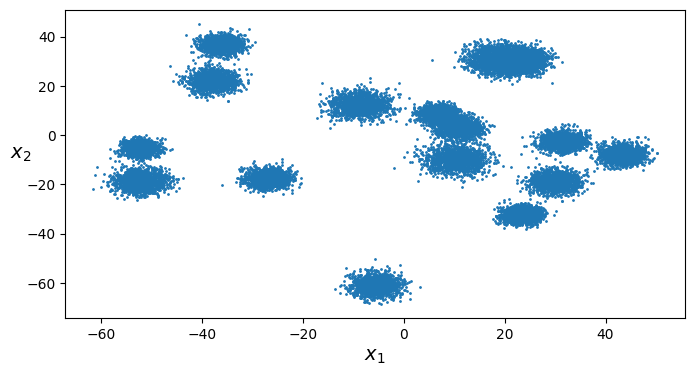

Número de clusters generados: 17


In [255]:
plt.figure(figsize=(8, 4))
plot_clusters(X_2D)
plt.show()
print("Número de clusters generados:", n_centroids)


In [256]:
from sklearn.cluster import KMeans

k = n_centroids
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)
y_pred


array([14,  4,  3, ..., 11,  9,  1], dtype=int32)

In [257]:
print(kmeans.cluster_centers_)

[[4.55407796e+01 9.93446987e+00 2.20066250e+01 3.59153834e+01
  4.23681309e+01 8.32504418e+00 3.32401034e+01 4.03821659e+01
  2.75651524e+01 8.32124582e+00 1.80379133e+00 1.41345212e+01
  4.04666798e+01 2.21155542e+00 3.59166007e-01 1.80796510e+01
  3.15768618e+00 7.38777224e+00 1.19060752e+00 2.61770858e+01
  3.48786194e+01 2.13008368e+01]
 [1.15441458e+01 2.74666384e+01 4.55081081e+01 6.59970476e+00
  2.62693926e+01 3.74584490e+01 3.34394769e+01 2.33489025e+01
  1.02227906e+01 2.45629447e+01 1.86162420e+01 2.39050966e+01
  1.82739270e+01 4.18676500e+01 3.84341225e+01 1.57595938e+01
  2.86402630e+01 1.36866700e+01 2.25959203e+01 1.75875304e+01
  3.28598896e+01 1.85103220e+01]
 [2.28591734e+01 3.60606004e+01 2.05961514e+01 4.53343001e+01
  8.97392923e+00 3.70757741e+01 2.10547727e+01 2.13557382e+01
  3.18070488e+01 2.63404603e+01 2.07734892e+01 6.38430593e-03
  4.66685479e+00 3.54869950e+01 2.62324895e+01 3.48682639e+01
  4.77629523e+01 3.41486381e+01 2.57700448e+00 1.54752469e+01
  2.

In [258]:
X_new = np.random.rand(4, 22) * 50
kmeans.predict(X_new)

array([ 7, 14, 14,  2], dtype=int32)

<Figure size 800x600 with 0 Axes>

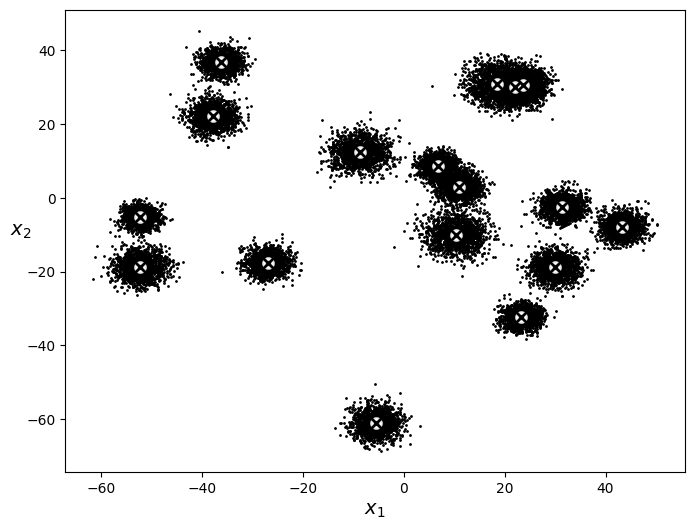

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, circle_color='w', cross_color='k'):
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=50, linewidths=2,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=2,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    pca = PCA(n_components=2)
    X_2D = pca.fit_transform(X)

    # Fondo blanco
    plt.figure(figsize=(8, 6))
    plt.gca().set_facecolor('white')

    plot_data(X_2D)

    if show_centroids:
        plot_centroids(pca.transform(clusterer.cluster_centers_))

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 6))
plot_decision_boundaries(kmeans, X)
plt.show()


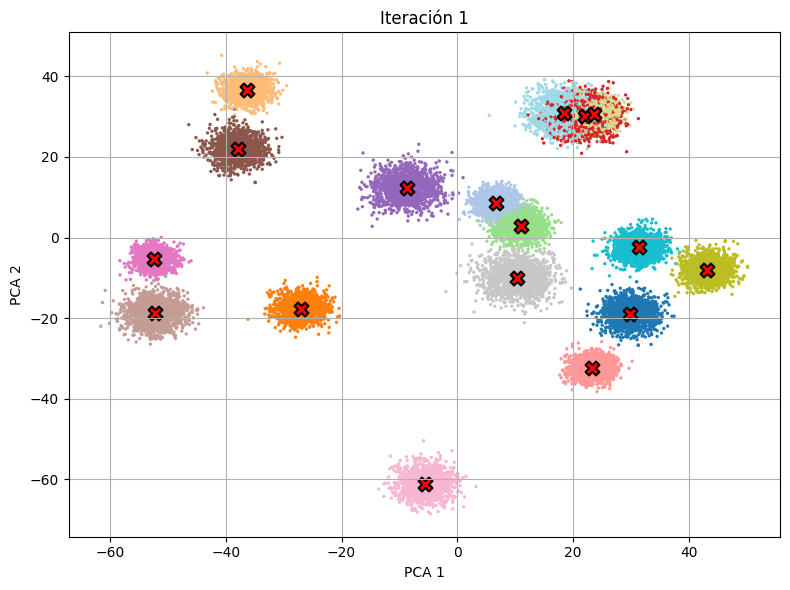

Convergió en la iteración 1


In [ ]:
# Función para graficar cada paso
def plot_kmeans_step(X, kmeans, iteration):
    pca = PCA(n_components=2)
    X_2D = pca.fit_transform(X)
    centroids_2D = pca.transform(kmeans.cluster_centers_)

    plt.figure(figsize=(8, 6))
    plt.scatter(X_2D[:, 0], X_2D[:, 1], c=kmeans.labels_, cmap='tab20', s=2)
    plt.scatter(centroids_2D[:, 0], centroids_2D[:, 1],
                c='red', s=100, marker='X', edgecolors='black', linewidths=1.5)
    plt.title(f'Iteración {iteration}')
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Función para realizar KMeans con visualización en cada iteración
def kmeans_with_visualization(X, k, max_iter=10):
    kmeans = KMeans(n_clusters=k, n_init=1, max_iter=1, random_state=42, verbose=0)

    # Ejecutar KMeans iterando
    for i in range(1, max_iter + 1):
        # Ajustar el modelo para la iteración actual
        kmeans.fit(X)

        # Graficar el paso
        plot_kmeans_step(X, kmeans, i)

        # Si convergió antes de alcanzar el máximo de iteraciones, salimos
        if kmeans.n_iter_ == i:
            print(f"Convergió en la iteración {i}")
            break

    return kmeans

final_kmeans = kmeans_with_visualization(X, k=n_centroids, max_iter=10)

In [261]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

np.float64(0.7997786907064924)

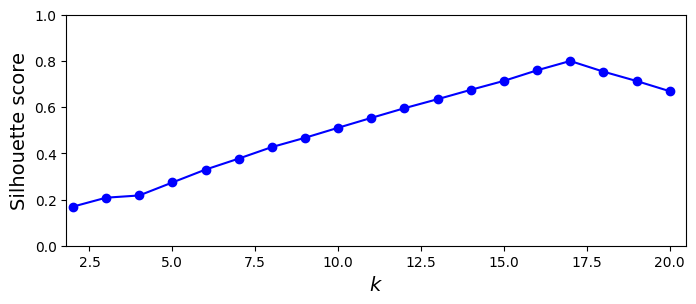

In [262]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, n_centroids+4)]

silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, n_centroids+4), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, n_centroids+3.5, 0, 1])
plt.show()



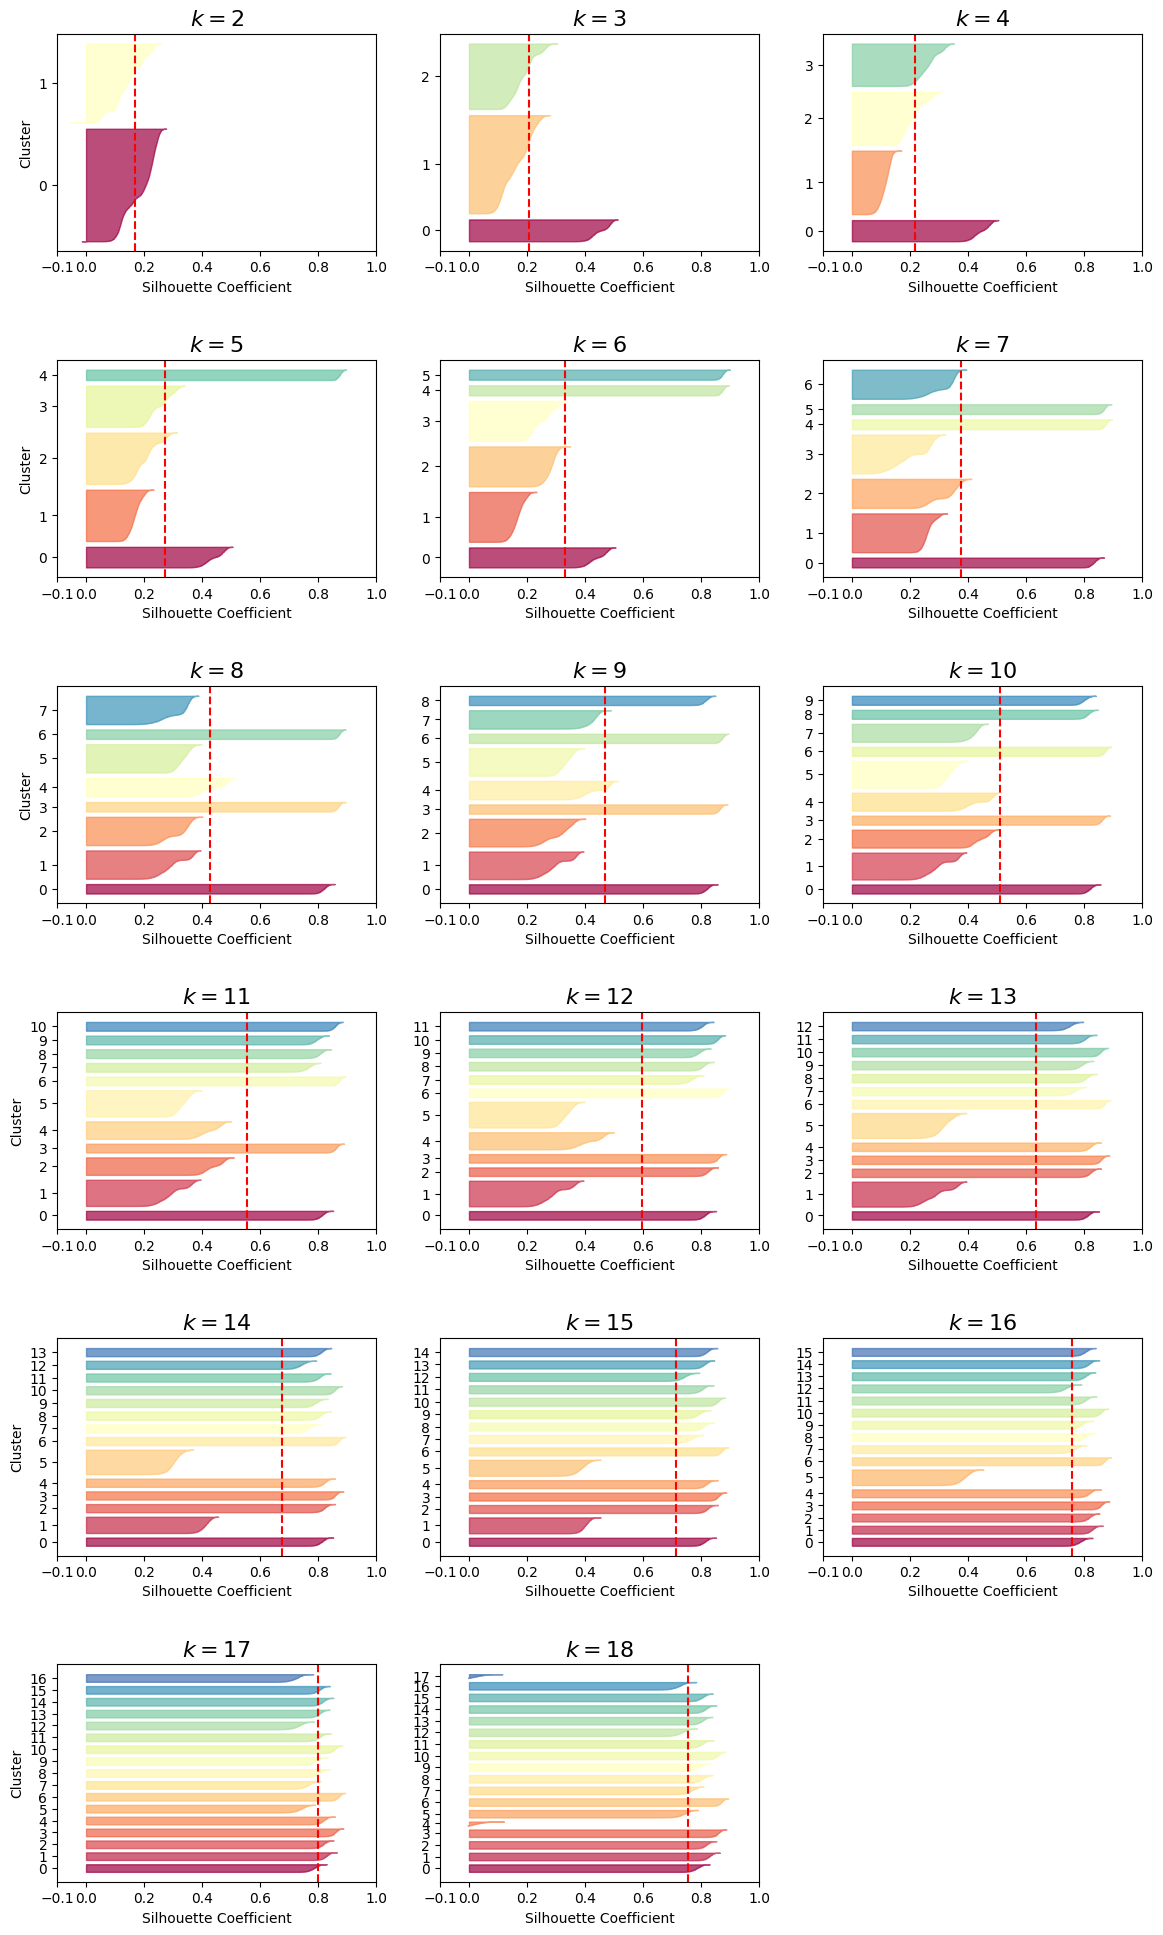

In [263]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl
import math

n_rows = math.ceil((n_centroids) / 3)
n_cols = 3

plt.figure(figsize=(14, 24))

for k in range(2, n_centroids+2):
    plt.subplot(n_rows, n_cols, k - 1)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in range(2, n_centroids+2, 3):
        plt.ylabel("Cluster")

    if k in range(2, n_centroids+2, 1):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.subplots_adjust(hspace=0.5)
plt.show()


# Punto 2.

### **Consigna**

- Buscar un dataset que no tenga etiquetas, que tenga un n mayor a 10 y un m mayor a 10.000 ejemplos, tendrá mayores puntajes, datasets que tengan contenido gráfico, audio, textos o datos que muestre efectos reales en cualquier ámbito.
- Los datasets no deben ser similares para ello deben coordinar esto con el universitario Aly Delgado Danner Abel.
- Aplicar aprendizaje semisupervisado
- Aplicar aprendizaje activo

### **Explicación del Dataset**


Este dataset contiene estadísticas de partidas clasificadas de **League of Legends** en el rango **Diamante I a Maestro**, recolectadas durante los **primeros 10 minutos de juego**. Cada fila representa una partida, y las columnas muestran datos acumulados por equipo (azul o rojo). El objetivo es analizar el rendimiento inicial y explorar patrones o estrategias mediante técnicas de aprendizaje automático.

| **Columna**                    | **Descripción (en español)**                                    |
|-------------------------------|----------------------------------------------------------------|
| blueWardsPlaced                | Centinelas colocados por el equipo azul                         |
| blueWardsDestroyed             | Centinelas enemigos destruidos por el equipo azul               |
| blueFirstBlood                 | Si el equipo azul consiguió la primera sangre (1: sí, 0: no)    |
| blueKills                      | Asesinatos logrados por el equipo azul                          |
| blueDeaths                     | Muertes sufridas por el equipo azul                             |
| blueAssists                    | Asistencias realizadas por el equipo azul                       |
| blueEliteMonsters              | Monstruos épicos (dragón/heraldo) conseguidos por el equipo azul |
| blueDragons                    | Dragones derrotados por el equipo azul                          |
| blueHeralds                    | Heraldos derrotados por el equipo azul                          |
| blueTowersDestroyed            | Torres destruidas por el equipo azul                            |
| blueTotalGold                  | Oro total acumulado por el equipo azul                          |
| blueAvgLevel                   | Nivel promedio de los campeones del equipo azul                 |
| blueTotalExperience            | Experiencia total acumulada por el equipo azul                  |
| blueTotalMinionsKilled         | Súbditos eliminados por el equipo azul                          |
| blueTotalJungleMinionsKilled   | Monstruos de jungla eliminados por el equipo azul               |
| blueGoldDiff                   | Diferencia de oro a favor del equipo azul                       |
| blueExperienceDiff             | Diferencia de experiencia a favor del equipo azul               |
| blueCSPerMin                   | Súbditos por minuto del equipo azul                             |
| blueGoldPerMin                 | Oro por minuto del equipo azul                                  |
| redWardsPlaced                 | Centinelas colocados por el equipo rojo                         |
| redWardsDestroyed              | Centinelas enemigos destruidos por el equipo rojo               |
| redFirstBlood                  | Si el equipo rojo consiguió la primera sangre (1: sí, 0: no)    |
| redKills                       | Asesinatos logrados por el equipo rojo                          |
| redDeaths                      | Muertes sufridas por el equipo rojo                             |
| redAssists                     | Asistencias realizadas por el equipo rojo                       |
| redEliteMonsters               | Monstruos épicos conseguidos por el equipo rojo                 |
| redDragons                     | Dragones derrotados por el equipo rojo                          |
| redHeralds                     | Heraldos derrotados por el equipo rojo                          |
| redTowersDestroyed             | Torres destruidas por el equipo rojo                            |
| redTotalGold                   | Oro total acumulado por el equipo rojo                          |
| redAvgLevel                    | Nivel promedio de los campeones del equipo rojo                 |
| redTotalExperience             | Experiencia total acumulada por el equipo rojo                  |
| redTotalMinionsKilled          | Súbditos eliminados por el equipo rojo                          |
| redTotalJungleMinionsKilled    | Monstruos de jungla eliminados por el equipo rojo               |
| redGoldDiff                    | Diferencia de oro a favor del equipo rojo                       |
| redExperienceDiff              | Diferencia de experiencia a favor del equipo rojo               |
| redCSPerMin                    | Súbditos por minuto del equipo rojo                             |
| redGoldPerMin                  | Oro por minuto del equipo rojo                                  |



### **Preparación del dataset**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset_path = r'D:\Proyectos\Machine Learning\Datasets\high_diamond_ranked_10min.csv'
df = pd.read_csv(dataset_path)
clean_df = df.drop(columns=['gameId'])
print("Características:\n{}".format(clean_df.head().to_string(index=False)))

Características:
 blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  blueKills  blueDeaths  blueAssists  blueEliteMonsters  blueDragons  blueHeralds  blueTowersDestroyed  blueTotalGold  blueAvgLevel  blueTotalExperience  blueTotalMinionsKilled  blueTotalJungleMinionsKilled  blueGoldDiff  blueExperienceDiff  blueCSPerMin  blueGoldPerMin  redWardsPlaced  redWardsDestroyed  redFirstBlood  redKills  redDeaths  redAssists  redEliteMonsters  redDragons  redHeralds  redTowersDestroyed  redTotalGold  redAvgLevel  redTotalExperience  redTotalMinionsKilled  redTotalJungleMinionsKilled  redGoldDiff  redExperienceDiff  redCSPerMin  redGoldPerMin
        0               28                   2               1          9           6           11                  0            0            0                    0          17210           6.6                17039                     195                            36           643                  -8          19.5          1721.0              

In [10]:
columnas = [
    'Guardianes Colocados',
    'Guardianes Destruidos',
    'Asesinatos',
    'Muertes',
    'Asistencias',
    'Monstruos Épicos',
    'Dragones',
    'Heraldos',
    'Torres Destruidas',
    'Oro Total',
    'Nivel Promedio',
    'Experiencia Total',
    'Súbditos Asesinados',
    'Monstruos de Jungla Asesinados',
    'Súbditos por Minuto',
    'Oro por Minuto'
]


In [11]:
X_blue = clean_df[['blueWardsPlaced',
                   'blueWardsDestroyed',
                   'blueKills',
                   'blueDeaths' ,
                   'blueAssists' ,
                   'blueEliteMonsters',
                   'blueDragons' ,
                   'blueHeralds' ,
                   'blueTowersDestroyed' ,
                   'blueTotalGold' , 'blueAvgLevel' ,
                   'blueTotalExperience' ,
                   'blueTotalMinionsKilled' ,
                   'blueTotalJungleMinionsKilled' ,
                   'blueCSPerMin' ,
                   'blueGoldPerMin']].values
X_red = clean_df[['redWardsPlaced' ,
                  'redWardsDestroyed' ,
                  'redKills' , 'redDeaths' ,
                  'redAssists' ,
                  'redEliteMonsters' ,
                  'redDragons' ,
                  'redHeralds' ,
                  'redTowersDestroyed' ,
                  'redTotalGold' ,
                  'redAvgLevel' ,
                  'redTotalExperience' ,
                  'redTotalMinionsKilled' ,
                  'redTotalJungleMinionsKilled' ,
                  'redCSPerMin' ,
                  'redGoldPerMin']].values

X_teams = np.vstack([X_blue, X_red])

# Conjunto para test seran los ultimos 2000 datos
X_train = X_teams[:-2000]
X_test = X_teams[-2000:]
# Parte del conjuto de entrenamiento para etiquetar 1000 primeros datos
X_train_etiquetar = X_train[:1000]


#### Etiquetado manual

Se hizo el etiquetado utilizando los conocimientos de los integrantes del grupo

In [18]:
y_train = np.array([
     3,2,2,0,1,0,3,2,1,2,2,1,1,0,0,2,4,2,3,0,4,0,0,1,3,2,3,1,3,0,3,0,3,2,1,0,0,0,1,2,0,4,3,2,1,2,4,4,2,0,3,1,0,1,0,0,0,3,1,4,2,3,1,4,2,2,0,3,0,0,1,0,1,2,1,3,0,3,4,1,4,3,0,3,3,4,0,0,4,2,2,0,1,4,1,0,3,4,4,0,0,0,2,1,3,1,0,0,1,1,0,0,3,2,4,3,3,0,2,3,3,2,1,4,2,3,2,1,3,3,1,3,0,2,0,0,3,4,1,2,2,2,1,2,3,4,3,2,4,0,0,0,0,3,0,1,4,4,2,0,3,1,4,0,0,0,2,3,0,4,2,0,0,3,0,1,1,2,1,0,1,2,1,4,0,2,1,3,1,2,1,2,4,2,0,3,1,4,2,4,3,1,0,1,2,2,2,0,0,0,0,3,1,0,1,4,0,0,0,2,4,2,1,0,4,0,0,4,1,1,1,3,0,3,2,0,3,1,0,3,2,1,4,2,1,1,1,4,1,0,1,0,0,4,1,4,4,2,1,0,1,1,4,2,4,4,2,3,2,2,1,2,3,3,1,1,2,0,2,0,4,0,4,0,1,4,2,1,0,3,2,0,2,0,0,0,1,3,0,2,4,3,0,2,1,3,1,0,0,1,0,4,1,3,3,2,4,3,0,0,0,0,0,0,4,0,1,4,4,2,1,1,0,0,1,1,0,0,4,3,1,2,2,3,2,0,1,3,3,2,0,0,1,1,0,1,4,2,1,0,2,4,3,0,1,1,0,3,1,0,0,0,2,1,3,2,4,2,0,0,0,0,0,4,4,3,1,0,1,0,4,2,1,2,3,1,0,0,3,3,4,4,4,3,3,1,2,0,0,0,3,0,3,4,4,0,1,2,3,3,4,1,1,4,3,3,0,4,1,0,4,2,2,0,4,1,4,3,3,3,1,4,1,0,0,0,0,1,2,0,3,1,4,3,1,1,2,4,4,0,0,1,0,0,1,0,0,1,4,2,3,0,3,2,2,4,4,0,0,2,3,3,0,0,0,1,1,0,1,1,4,1,0,4,4,4,2,3,0,3,3,1,4,2,0,3,1,2,1,3,1,3,3,1,1,1,0,4,0,0,2,1,0,2,3,0,1,1,3,3,1,2,0,3,0,2,0,4,4,3,1,1,1,1,3,4,4,0,4,1,1,0,3,1,4,4,0,2,2,3,3,3,0,2,2,2,3,1,1,1,2,2,3,4,1,4,2,1,3,1,3,3,1,1,0,0,3,3,0,0,4,0,4,2,4,0,1,4,3,0,0,0,3,4,1,0,1,0,0,3,1,3,2,1,3,4,0,1,1,0,2,3,1,0,2,1,1,1,3,2,3,1,1,2,1,2,1,0,0,4,3,3,3,1,2,3,1,1,1,4,0,2,2,2,1,4,4,2,4,1,3,0,0,1,1,1,4,0,0,3,1,2,0,4,0,1,2,0,3,4,1,0,1,0,1,2,2,1,1,4,0,3,1,0,2,0,1,0,1,2,3,4,4,0,3,0,3,2,1,1,0,1,4,2,0,0,0,0,3,4,3,1,1,0,3,4,0,0,0,0,2,4,1,3,3,4,3,1,3,0,1,0,0,3,2,2,0,0,2,1,1,2,0,1,1,2,1,3,0,0,1,0,0,1,0,1,0,4,4,0,3,3,3,1,3,2,0,2,1,4,4,3,1,0,1,0,2,0,0,0,4,0,2,1,0,4,3,0,1,0,4,4,3,3,2,0,2,3,4,0,2,4,0,0,2,0,0,4,3,0,4,0,3,0,4,4,1,2,3,2,2,4,2,0,0,0,0,0,2,4,1,3,1,1,3,0,0,4,1,1,1,3,3,0,1,1,2,1,4,0,0,3,2,0,0,2,0,4,1,1,1,2,1,2,4,4,1,1,0,0,3,0,1,1,1,2,3,2,0,3,0,4,1,0,2,2,1,2,0,2,4,2,0,2,1,0,3,0,1,1,1,4,3,4,1,3,0,1,3,3,1,0,0,4,0,2,0,3,0,3,0,4,1,4,0,2,4,0,4,0,1,4,1,4,4,3,1,2,0,3,0,0,1,4,1,0,4,0,3,1,0,4,0,0,1,3,0,3,0,2,1,1,4,2,3,3,2,4,2,3,4,2,1,3,4,1,2,0,1,2,1,0,4,0,1,2,2,1,0,3
])
print('Catidad de datos etiquetados de Y_Train',y_train.shape[0])

y_test = np.array([
     1,1,0,2,1,1,0,3,0,0,4,0,3,2,3,1,1,0,1,0,3,0,3,0,3,2,0,1,3,0,0,1,0,0,0,1,3,4,3,1,0,1,1,1,3,2,0,2,0,1,1,2,0,4,0,4,1,3,2,0,1,1,3,0,1,0,3,0,1,3,1,1,3,0,2,2,0,2,0,0,3,4,3,0,2,3,3,2,2,1,3,0,1,1,1,1,3,1,0,1,1,1,4,0,3,3,1,0,4,0,2,0,0,2,0,1,4,2,1,0,0,4,0,1,2,1,1,2,4,0,3,4,0,2,1,4,0,0,0,2,4,1,3,4,2,0,1,2,0,4,0,1,4,3,1,1,4,0,0,0,0,0,0,1,0,4,1,4,0,1,1,4,2,3,0,0,3,3,0,4,1,3,0,3,1,4,1,2,0,2,0,0,0,1,4,1,1,4,0,0,0,3,0,2,0,2,1,3,3,4,4,4,0,1,0,2,2,4,0,3,1,3,4,1,3,0,4,0,0,0,2,1,2,2,3,2,0,2,1,3,4,1,2,3,1,4,4,2,0,1,0,2,2,1,2,0,0,2,1,2,3,1,3,0,3,4,4,1,1,1,0,0,2,4,2,0,1,4,4,0,0,1,0,4,4,0,2,1,3,3,3,1,1,3,0,2,0,1,3,0,0,0,0,0,0,0,1,1,1,3,0,0,0,0,0,2,0,0,3,4,4,1,0,0,3,1,4,3,1,0,3,3,0,1,1,1,0,0,4,1,0,0,1,0,4,1,1,0,0,4,2,4,3,3,1,1,3,0,0,1,2,0,3,1,1,4,2,0,2,4,3,3,2,4,0,0,2,1,0,2,2,2,0,1,0,4,3,0,2,2,0,4,0,1,3,4,2,3,1,3,3,0,4,4,0,3,4,4,3,4,4,2,4,2,1,4,1,4,0,2,3,1,4,4,2,0,2,1,1,2,1,3,1,4,0,1,0,2,3,0,1,1,2,0,1,0,3,2,1,1,0,1,0,0,4,2,0,2,4,4,1,1,2,2,3,0,4,0,0,2,0,4,3,4,3,1,4,2,1,4,3,4,1,0,1,2,3,1,1,1,0,4,3,2,4,1,0,0,0,0,1,2,2,4,0,0,1,0,1,1,1,1,1,0,1,0,4,3,4,2,4,2,4,0,0,4,0,0,4,2,1,0,3,1,0,3,2,0,4,1,4,4,0,3,0,4,2,1,4,3,4,2,1,3,4,0,1,4,0,4,1,1,3,3,0,4,4,4,1,4,0,2,3,4,2,3,1,3,0,3,4,3,3,4,1,0,3,2,0,0,0,3,1,0,0,4,0,2,1,0,0,4,0,4,2,1,0,1,0,2,1,2,1,3,2,2,3,1,2,1,1,2,2,3,1,0,1,3,0,4,2,1,2,0,3,2,4,0,3,0,3,2,2,3,1,1,0,1,3,0,3,0,1,2,3,0,3,0,1,0,1,3,1,2,1,1,1,2,0,0,3,1,4,0,2,2,2,4,0,3,0,0,4,1,0,1,4,0,0,3,3,1,4,3,1,2,0,3,1,1,2,2,3,3,1,0,0,0,4,4,3,2,3,3,4,0,1,3,1,0,0,4,4,0,3,1,2,4,2,1,1,0,3,3,0,1,0,0,0,4,1,0,0,1,3,1,0,3,2,2,0,1,2,3,0,1,0,1,0,0,4,2,2,2,0,3,1,3,3,0,0,3,1,3,4,4,4,2,3,0,3,4,1,0,2,3,4,0,0,1,0,0,0,0,1,4,1,2,1,0,4,3,0,2,4,1,4,0,1,0,2,4,3,4,4,4,4,3,2,2,0,4,0,2,4,0,3,0,3,1,0,0,3,3,1,2,2,2,0,3,1,2,0,4,0,3,0,4,2,3,2,4,3,0,2,3,3,3,1,3,0,4,3,0,0,0,2,1,2,1,3,4,3,0,0,0,4,0,4,1,3,2,3,1,0,0,2,2,0,3,2,2,1,0,0,0,0,2,3,0,1,3,1,0,1,1,1,1,3,2,3,1,2,0,1,3,0,4,0,0,0,1,0,1,1,1,4,0,0,2,2,1,0,2,0,2,2,2,4,1,0,0,1,2,3,0,0,3,4,1,0,2,3,2,1,4,2,3,4,0,0,2,0,0,3,2,0,0,0,0,0,3,1,2,3,1,3,1,3,1,3,2,0,1,2,3,0,4,3,3,1,0,0,2,2,0,0,1,2,3,1,0,3,3,2,3,0,3,0,1,2,1,1,0,1,4,1,4,0,3,2,0,4,2,4,0,1,3,0,1,3,0,1,4,0,4,0,1,1,2,0,0,0,0,4,4,0,0,0,0,3,1,0,3,0,0,0,3,0,0,2,0,4,2,0,0,4,0,1,0,2,1,1,2,2,0,4,1,0,4,2,3,4,3,2,0,1,3,2,1,2,1,3,2,0,3,3,1,2,3,4,3,0,0,0,1,0,0,2,0,4,4,4,1,3,0,1,2,1,2,3,3,0,0,2,2,1,1,0,3,1,3,0,4,0,3,2,1,1,2,4,3,1,2,4,1,0,3,3,4,3,2,3,0,4,2,2,3,3,1,1,1,1,0,0,3,0,4,2,0,1,3,1,0,3,2,1,0,1,1,1,3,0,1,2,0,3,1,4,0,2,0,2,3,2,1,0,0,0,3,2,0,3,3,0,2,2,1,4,1,0,1,1,2,1,0,0,1,2,2,4,0,1,2,1,1,0,0,3,3,0,3,4,4,2,3,4,3,1,0,3,1,2,2,1,2,0,3,1,1,0,3,4,0,2,0,1,0,1,2,2,3,0,1,2,3,1,0,3,3,1,0,2,0,0,2,0,3,0,0,0,0,0,1,3,3,2,1,1,1,3,0,0,1,0,4,3,4,4,0,2,0,0,4,1,3,2,3,3,0,3,2,3,2,3,3,0,1,2,0,1,2,0,3,1,0,3,1,1,2,1,4,1,0,3,3,1,2,0,3,4,3,1,0,4,0,0,1,4,1,0,2,3,0,2,0,2,0,3,4,0,3,1,2,0,1,0,4,3,1,4,4,0,3,1,4,0,2,3,0,3,0,4,0,0,0,0,2,4,0,0,4,0,0,0,3,4,0,3,0,2,2,3,3,2,0,1,1,0,1,2,1,3,1,2,3,1,2,0,3,1,0,4,0,0,3,1,2,0,1,2,0,2,4,4,4,1,1,0,0,0,0,2,4,1,0,1,3,1,3,3,2,4,2,2,1,1,2,1,4,0,0,0,0,0,2,3,0,2,3,2,2,3,1,3,4,3,1,0,0,0,0,4,0,3,0,3,3,3,4,3,4,1,1,2,4,0,0,2,1,0,1,0,1,4,4,1,4,0,0,0,1,0,0,1,3,0,4,2,2,3,0,1,1,0,1,1,0,1,1,1,2,4,3,4,0,1,3,1,1,2,2,4,0,0,2,0,3,4,4,3,1,4,0,1,0,0,1,1,4,1,2,1,2,3,3,0,3,0,2,2,0,1,1,0,3,3,2,2,1,2,4,4,3,1,3,1,3,2,0,3,0,2,0,0,0,0,3,1,3,0,1,0,1,0,4,0,4,2,2,0,1,0,1,0,0,1,2,0,0,1,3,3,0,3,1,0,3,1,0,4,3,2,3,2,3,3,3,4,2,0,0,4,4,0,0,4,2,3,3,2,2,2,3,3,0,1,3,0,4,1,1,1,3,3,1,1,0,4,4,0,1,2,1,0,2,1,4,0,3,2,1,0,1,2,3,2,2,0,1,3,4,0,2,3,4,0,1,4,4,3,0,2,1,2,1,0,1,1,3,0,0,0,0,0,1,4,4,1,1,4,0,2,0,3,2,1,3,1,2,0,2,0,0,2,2,0,3,4,2,1,1,4,2,1,1,1,1,3,0,3,1,3,1,3,2,1,2,4,0,3,2,1,0,1,0,3,2,4,0,3,0,3,0,3,1,4,4,1,4,0,4,4,0,2,0,0,1,0,1,1,3,1,1,0,1,0,0,1,1,3,2,0,0,0,1,1,1,3,4,0,2,2,2,4,4,1,0,0,2,3,0,0,3,4,4,0,3,2,4,0,4,0,4,0,4,3,0,2,3,4,0,1,3,3,1,0,4,0,4,3,0,1,3,1,0,2,1,3,3,1,4,3,4,0,2,1,1,0,1,1,2,0,0,3,3,3,2,0,3,0,0,1,0,3,0,0,2,2,3,0,0,1,0,0,3,0,4,3,0,3,3,1,4,0,2,4,0,1,1,2,3,0,4,2,1,0,1,3,3,2,3,1,1,0,3,0,4,4,0,3,0,1,1,1,1,2,4,0,2,1,4,1,1,4,4,3,0,2,0,1,2,4,0,0,3,3,3,1,4,0,1,3,1,0,0,4,0,0,0,1,2,1,1,1,0,0,2,3,0,0,1,4,0,1,2,1,2,0,2,4,0,0,3,0,2,0,4,0,0
])
print('Cantidad de Etiquetados de Y_test',y_test.shape[0])

Catidad de datos etiquetados de Y_Train 1000
Cantidad de Etiquetados de Y_test 2000


In [232]:
print(X_train.shape[1])
print(X_train.shape[0])

16
17758


### Encontrando el número óptimo de grupos

Como hemos visto anteriormente, el número de grupos o *clusters* es un hyperparámetro del modelo que debemos definir, y como podrás imaginar si nuestros datos no están etiquetados no será imposible saber qué valor usar. Para ello la solución se basa en usar diferentes valores y utilizar alguna métrica significativa. Una de estas métricas se conoce como el *silhouette score*, que se basa en calcular el coeficiente de silueta (*silhouette coefficient*) de todas las muestras del dataset como $(b-a)/\mathrm{max}(a,b)$ donde $a$ es la distancia mínima al resto de muestras del mismo grupo y $b$ es la distancia media de los grupos más cercanos. Su valor se encuentra entre $1$ y $-1$. Un valor cercano a $1$ indica que la muestra está bien metida en su grupo y lejos de los demás mientras que un valor cercano a $0$ indica que la muestra se encuentra cerca de una frontera de decisión y un valor cercano a $-1$ indica que la muestra está en el grupo incorrecto.

Calculando la métrica para diferentes números de *clusters* podemos encontrar el valor óptimo.

In [233]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans_per_k = [KMeans(n_clusters=k, init='k-means++', random_state=42).fit(X_train) for k in range(2, 13)]

silhouette_scores = [silhouette_score(X_train, model.labels_) for model in kmeans_per_k[1:]]

print(kmeans_per_k)
print(silhouette_scores)

[KMeans(n_clusters=2, random_state=42), KMeans(n_clusters=3, random_state=42), KMeans(n_clusters=4, random_state=42), KMeans(n_clusters=5, random_state=42), KMeans(n_clusters=6, random_state=42), KMeans(n_clusters=7, random_state=42), KMeans(random_state=42), KMeans(n_clusters=9, random_state=42), KMeans(n_clusters=10, random_state=42), KMeans(n_clusters=11, random_state=42), KMeans(n_clusters=12, random_state=42)]
[np.float64(0.3799859085485431), np.float64(0.3377531991929403), np.float64(0.3357011594403875), np.float64(0.3258024795901349), np.float64(0.3111721732222758), np.float64(0.3209190547936847), np.float64(0.31455107974014374), np.float64(0.3149884560695314), np.float64(0.31236880756196655), np.float64(0.3124481134272193)]


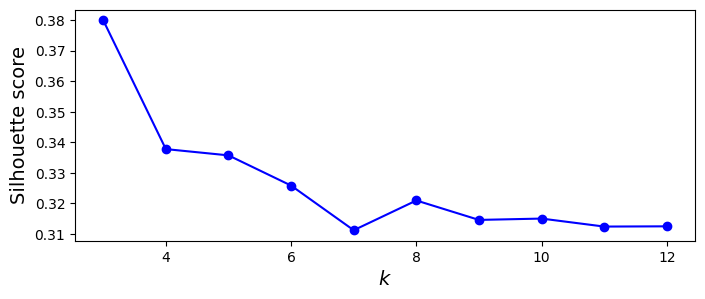

In [234]:
plt.figure(figsize=(8, 3))
plt.plot(range(3, 13), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

También es muy útil visualizar los diagramas de silueta, en el que visualizaremos todos los coeficientes de silueta ordenados por grupos y su valor.

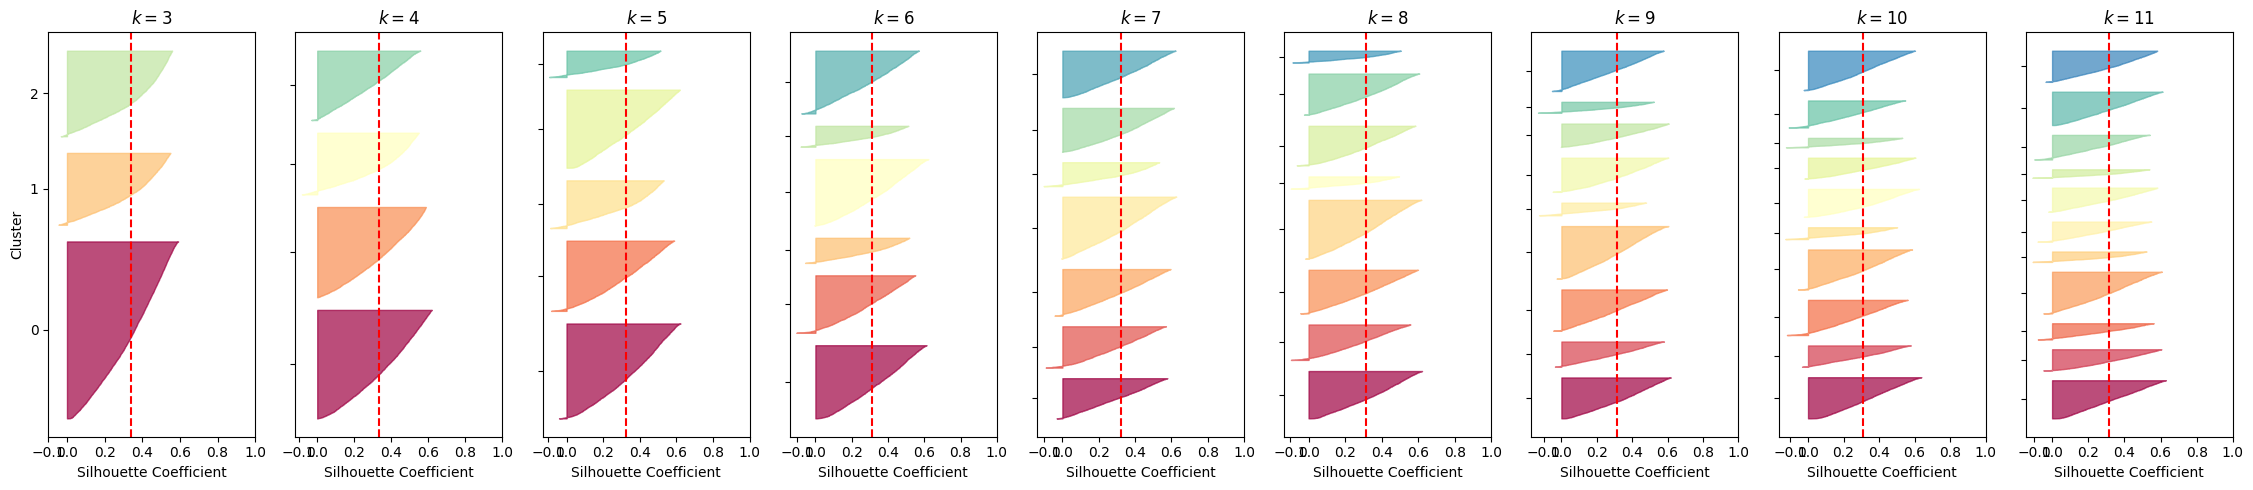

In [235]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(25, 5))  # Hazlo más ancho para ver bien los 10 plots

for idx, k in enumerate(range(3, 12), 1):
    plt.subplot(1, 10, idx)  # 1 fila, 10 columnas

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X_train, y_pred)

    padding = len(X_train) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))

    if idx == 1:
        plt.ylabel("Cluster")
    else:
        plt.tick_params(labelleft=False)

    plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.xlabel("Silhouette Coefficient")

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$", fontsize=12)

plt.tight_layout()
plt.show()


#### **Método del Codo**
El método del codo es una técnica utilizada para determinar el número óptimo de clusters (grupos) al aplicar algoritmos de agrupamiento como K-Means. Este método se basa en observar cómo cambia la WCSS (Within-Cluster Sum of Squares, o suma de los errores cuadráticos dentro de los clústeres) a medida que incrementamos el número de grupos K.

¿Qué significa la curva hacia abajo?
En el gráfico, el eje X representa la cantidad de clusters K y el eje Y representa la WCSS, que mide qué tan compactos son los clústeres formados.

Al aumentar el número de clusters K, los datos se agrupan mejor y la WCSS disminuye.

Sin embargo, llega un punto donde agregar más clusters no mejora significativamente la compactación. Ese punto de inflexión es el llamado "codo".

La curva hacia abajo indica que estamos obteniendo una mejor agrupación, pero si la curva ya no baja abruptamente, agregar más clusters podría no tener mucho sentido.

Identificar el "codo" es clave para elegir un valor de K eficiente y evitar tanto el subajuste (muy pocos grupos) como el sobreajuste (demasiados grupos).

In [236]:
#metodo del codo
wcss = []
for k in range(2, 20):
  kmeans_codo = KMeans(n_clusters=k, random_state=42)
  kmeans_codo.fit(X_train)
  wcss.append(kmeans_codo.inertia_)

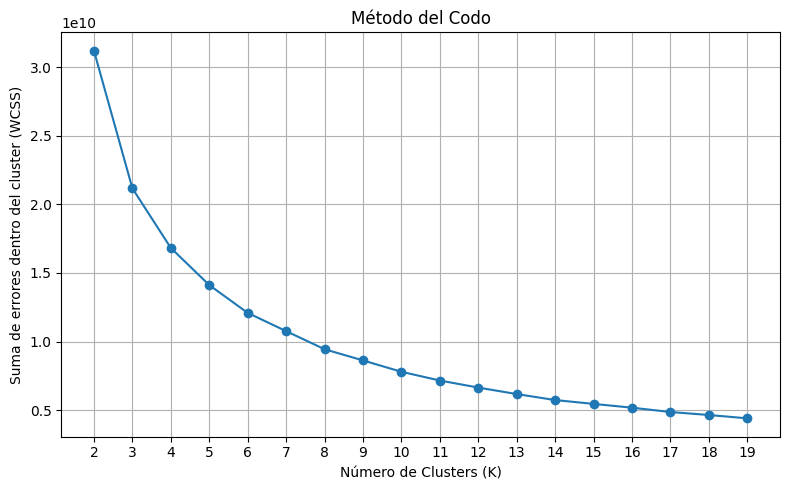

In [237]:
# Graficar la curva del codo
plt.figure(figsize=(8, 5))
plt.plot(range(2, 20), wcss, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Suma de errores dentro del cluster (WCSS)')
plt.xticks(range(2, 20))  # Mostrar todos los valores enteros en el eje X
plt.grid(True)
plt.tight_layout()
plt.show()

### **K-Means para aprendizaje semi-supervisado**

El aprendizaje semi-supervisado (o *Semi-supervised Learning*) comprende el conjunto de técnicas que nos permiten entrenar modelos con datasets parcialmente etiquetados. En esta sección vamos a ver un ejemplo de como podemos aplicar esta técnica con el dataset MNIST y usando *K-Means*.

In [238]:
print(X_train)

[[2.8000e+01 2.0000e+00 9.0000e+00 ... 3.6000e+01 1.9500e+01 1.7210e+03]
 [1.2000e+01 1.0000e+00 5.0000e+00 ... 4.3000e+01 1.7400e+01 1.4712e+03]
 [1.5000e+01 0.0000e+00 7.0000e+00 ... 4.6000e+01 1.8600e+01 1.6113e+03]
 ...
 [3.4000e+01 4.0000e+00 1.1000e+01 ... 4.4000e+01 1.8800e+01 1.7927e+03]
 [3.8000e+01 1.8000e+01 3.0000e+00 ... 6.0000e+01 2.3900e+01 1.5630e+03]
 [1.5000e+01 4.0000e+00 5.0000e+00 ... 5.6000e+01 1.8700e+01 1.5227e+03]]


Si el dataset no estuviese etiquetado, es decir, si tuviésemos solo los dígitos sin la clase (sólo $X$ y no $y$) y tampoco supiésemos cuantas clases diferentes tenemos. Lo primero que podríamos hacer es entrenar un modelo de *K-Means*. 
De esta manera encontraremos aquellas imágenes más representativas de cada grupo.

In [239]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)

In [240]:
idxs = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[idxs]

In [241]:
equipo_representativo = pd.DataFrame(X_representative_digits, columns=columnas)
print("Equipos mas represntativos: \n {}".format(equipo_representativo.to_string(index=False)))

Equipos mas represntativos: 
  Guardianes Colocados  Guardianes Destruidos  Asesinatos  Muertes  Asistencias  Monstruos Épicos  Dragones  Heraldos  Torres Destruidas  Oro Total  Nivel Promedio  Experiencia Total  Súbditos Asesinados  Monstruos de Jungla Asesinados  Súbditos por Minuto  Oro por Minuto
                 19.0                    1.0         4.0      6.0          6.0               0.0       0.0       0.0                0.0    15540.0             6.8            17724.0                236.0                            54.0                 23.6          1554.0
                 15.0                    1.0         5.0      1.0          5.0               2.0       1.0       1.0                0.0    17065.0             7.0            18930.0                220.0                            54.0                 22.0          1706.5
                 38.0                    2.0         4.0      8.0          3.0               0.0       0.0       0.0                0.0    14592.0        

El siguiente paso consiste en anotar manualmente estas etiquetas 

In [242]:
y_pred_representative = kmeans.predict(X_representative_digits)
print(y_pred_representative)

[0 1 2 3 4]


| Clúster | Estilo de Juego                      | Posible Composición               |
| ------- | ------------------------------------ | --------------------------------- |
| 1       | Defensivo, sin objetivos             | Escalado, visión, pasivo          |
| 2       | Eficiente y proactivo                | Snowball temprano, agresivo       |
| 3       | Caótico, bajo control enemigo        | En desventaja, muy reactivo       |
| 4       | Equilibrado, responde y rota         | Midgame sólido, sin sobreextender |
| 5       | Dominio de línea, sin rotaciones aún | Laners fuertes, stomp temprano    |



Según las graficas existen 5 grupos balanceados que valdrian la pena analizar como se muestra en la tablas anteriores

In [243]:
y_representative_digits = np.array([0,1,2,3,4])

#### Usamos un modelo de regresion logistica de la libreria `sklearn.linear_model`

In [244]:
from sklearn.linear_model import LogisticRegression

log_reg2 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=10000, random_state=42)
%time log_reg2.fit(X_representative_digits, y_representative_digits)

log_reg2.score(X_test, y_test)

CPU times: user 298 ms, sys: 1.98 ms, total: 300 ms
Wall time: 154 ms


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


0.6335

Como puedes observar hemos obtenido una precisión de casi el $63%$ habiendo anotado simplemente 5 equipos, pero aquellas más representativas.

In [245]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=10000, random_state=42)
%time log_reg.fit(X_train[:5], y_train[:5])
log_reg.score(X_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


CPU times: user 107 ms, sys: 9 µs, total: 107 ms
Wall time: 56.2 ms


0.478

Esto pone de manifiesto que a la hora de entrenar modelos de ML no es tan importante la cantidad de datos, sino la calidad.

Ahora que tenemos un clasificador, podemos usarlo para anotar de manera automática el resto de imágenes. Para ello asignaremos, en cada grupo, la misma etiqueta a todas las muestras que la muestra representativa.

In [246]:
y_train_propagated = np.empty(len(X_train))
for i in range(k):
  y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [247]:
log_reg3 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=10000, random_state=42)
%time log_reg3.fit(X_train[:1000], y_train_propagated[:1000])
log_reg3.score(X_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


CPU times: user 27.1 s, sys: 113 ms, total: 27.2 s
Wall time: 16.8 s


0.7615

### **Aprendizaje Activo**

El aprendizaje activo (o *Active Learning*) consiste en entrenar modelos de ML de manera iterativa, incluyendo en cada iteración nuevas muestras al dataset focalizando en ejemplos en loa que el modelo tenga más problemas.

In [248]:
probas = log_reg3.predict_proba(X_train[:1000])
labels_ixs = np.argmax(probas, axis=1)
labels = np.array([proba[ix] for proba, ix in zip(probas, labels_ixs)])
sorted_ixs = np.argsort(labels)
labels[sorted_ixs[:10]]

array([0.30432113, 0.30956586, 0.32285439, 0.3267176 , 0.32898542,
       0.33155869, 0.33271373, 0.33388945, 0.33538103, 0.33746023])

In [249]:
X_lowest = X_train[:1000][sorted_ixs[:k]]

In [250]:
y_lowest = y_train[:1000][sorted_ixs[:k]]
y_lowest

array([1, 1, 1, 3, 4])

In [251]:
y_train2 = y_train_propagated[:1000].copy()
y_train2[sorted_ixs[:k]] = y_lowest

In [ ]:
log_reg5 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=10000, random_state=42)
%time log_reg5.fit(X_train[:1000], y_train2)
log_reg5.score(X_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


CPU times: user 27.2 s, sys: 110 ms, total: 27.4 s
Wall time: 16.2 s


0.7615

# Punto 3.

### **Consigna**

Buscar un dataset para otras técnicas de aprendizaje no supervisado
Aplicar dbscan, gaussian mixtures.
Se debe subir al repositorio de los integrantes del grupo, la evaluación del trabajo se realizará a través de la defensa del código fuente y las técnicas y procedimientos de aprendizaje no supervisado.

### **Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset_path = r'D:\Proyectos\Machine Learning\Datasets\BankChurners.csv'
df = pd.read_csv(dataset_path)
print("Características:\n{}".format(df.head().to_string(index=False)))

Características:
 CLIENTNUM    Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level Marital_Status Income_Category Card_Category  Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
 768805383 Existing Customer            45      M                3     High School        Married     $60K - $80K          Blue              39                         5                       1                      3       12691.0                  777          11914.0                 1.335             1144              42                1.625       

In [ ]:
from sklearn.model_selection import train_test_split

columns_to_drop = [
    'customer_id', 
    'churn',       
    'country',     
    'gender',     
    'surname'        
]
df_clean = df.drop(columns=[col for col in columns_to_drop if col in df.columns])
features = df_clean.select_dtypes(include=[np.number])
X_train, X_test = train_test_split(features, test_size=0.2, random_state=42)

print("Columnas con las que trabajaremos:\n", features.columns.tolist())

Columnas con las que trabajaremos:
 ['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
pca = PCA(n_components=2)
X_train_reduced = pca.fit_transform(X_train_scaled)
X_test_reduced = pca.transform(X_test_scaled)  

In [ ]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X_train_reduced) 

DBSCAN(eps=0.2)

In [ ]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int64)

In [ ]:
dbscan2 = DBSCAN(eps=0.31)
dbscan2.fit(X_train_reduced)
np.unique(dbscan2.labels_)

array([-1,  0,  1], dtype=int64)

In [ ]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

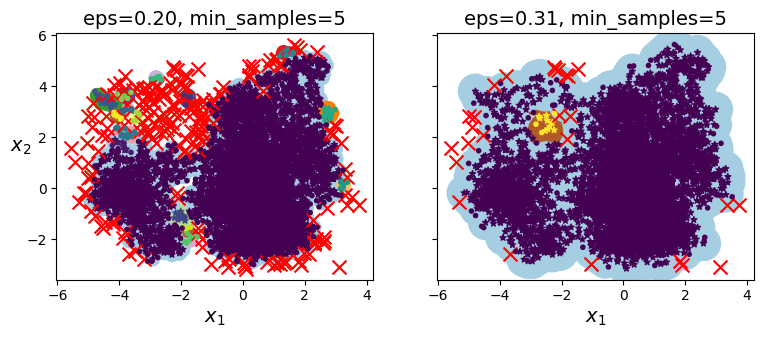

In [ ]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X_train_reduced, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X_train_reduced, size=600, show_ylabels=False)

plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

core_samples = dbscan2.components_
core_labels = dbscan2.labels_[dbscan2.core_sample_indices_]

knn = KNeighborsClassifier(n_neighbors=min(50, len(core_samples)))
knn.fit(core_samples, core_labels)

KNeighborsClassifier(n_neighbors=50)

In [ ]:
knn.predict(X_test_reduced)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
knn.predict_proba(X_test_reduced)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

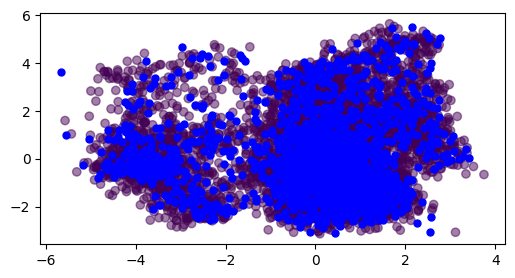

In [ ]:
plt.figure(figsize=(6, 3))

plt.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], 
           c=knn.predict(X_train_reduced), cmap='viridis', alpha=0.5)

plt.scatter(X_test_reduced[:, 0], X_test_reduced[:, 1], 
           c='blue', marker='.', s=100, label='Test points')
plt.show()

### **Gaussian Mixtures**

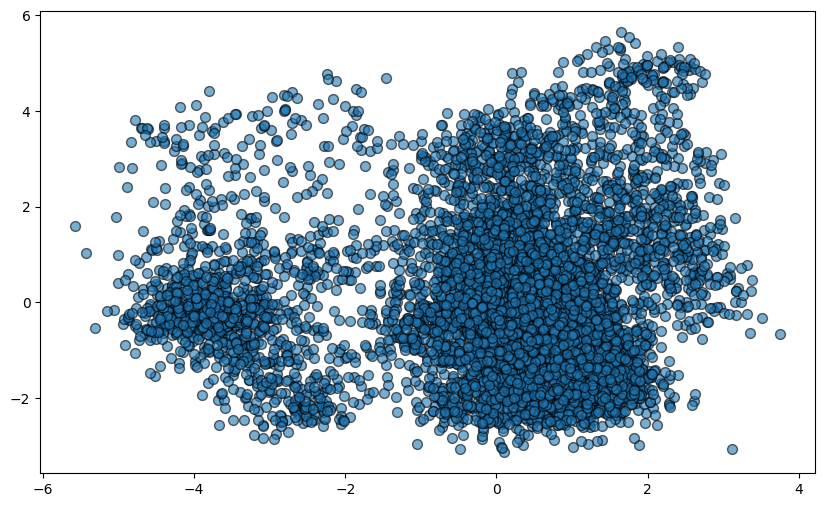

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_train_reduced[:, 0], 
            X_train_reduced[:, 1],  
            alpha=0.6,      
            edgecolor='k',         
            s=50) 

plt.show()

In [ ]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X_train_reduced)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [ ]:
from matplotlib.colors import LogNorm

def plot_centroids(centroids, weights=None, circle_color='r', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]

    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=10, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)

    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=10,
                color=cross_color, zorder=11, alpha=1)

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')

    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

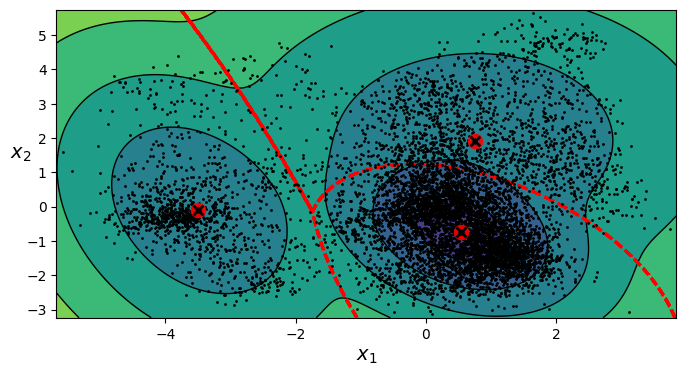

In [ ]:
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm, X_train_reduced)
plt.show()

In [ ]:
gm.weights_

array([0.24455771, 0.60771772, 0.14772457])

In [ ]:
gm.means_

array([[ 0.75072061,  1.90757279],
       [ 0.54657471, -0.74108451],
       [-3.49134644, -0.10926719]])

In [ ]:
gm.covariances_

array([[[ 1.5121663 ,  0.00942132],
        [ 0.00942132,  2.19879307]],

       [[ 0.53343098, -0.19436479],
        [-0.19436479,  0.87615226]],

       [[ 0.52998569, -0.30190957],
        [-0.30190957,  1.75788179]]])

In [ ]:
gm.predict(X_test_reduced)

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [ ]:
gm.predict_proba(X_test_reduced)

array([[1.75036648e-02, 9.82496252e-01, 8.28785646e-08],
       [1.45759529e-02, 9.85422866e-01, 1.18138933e-06],
       [1.75777657e-02, 9.82422233e-01, 1.65333362e-09],
       ...,
       [9.74037034e-02, 9.02596292e-01, 4.37132465e-09],
       [5.39734163e-02, 9.46013285e-01, 1.32991296e-05],
       [9.99331271e-01, 6.68729354e-04, 1.13919581e-14]])

In [ ]:
X_new, y_new = gm.sample(6)
X_new

array([[ 2.63651145,  2.84223482],
       [ 0.49871672, -1.01492851],
       [ 0.37549193,  0.88283659],
       [-2.98922761, -0.64419125],
       [-3.65699339, -0.79108971],
       [-4.82905456, -0.08450372]])

In [ ]:
y_new

array([0, 1, 1, 2, 2, 2])

In [ ]:
densities = gm.score_samples(X_train_reduced)
density_threshold = np.percentile(densities, 4)
anomalies = X_train_reduced[densities < density_threshold]

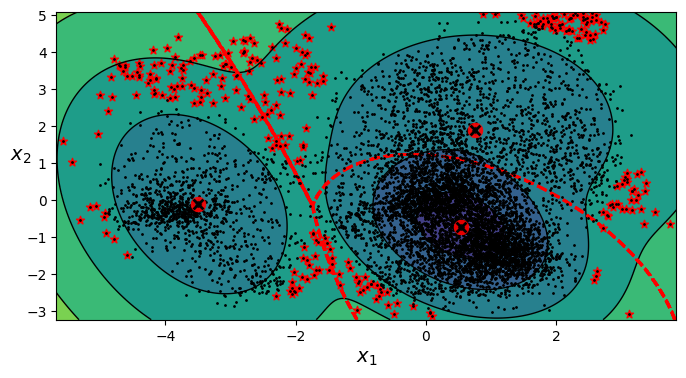

In [ ]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X_train_reduced)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

plt.show()

In [ ]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X_train_reduced)

C:\Users\diego\AppData\Roaming\Python\Python39\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

In [ ]:
np.round(bgm.weights_, 2)

array([0.26, 0.12, 0.08, 0.03, 0.06, 0.2 , 0.07, 0.03, 0.11, 0.05])

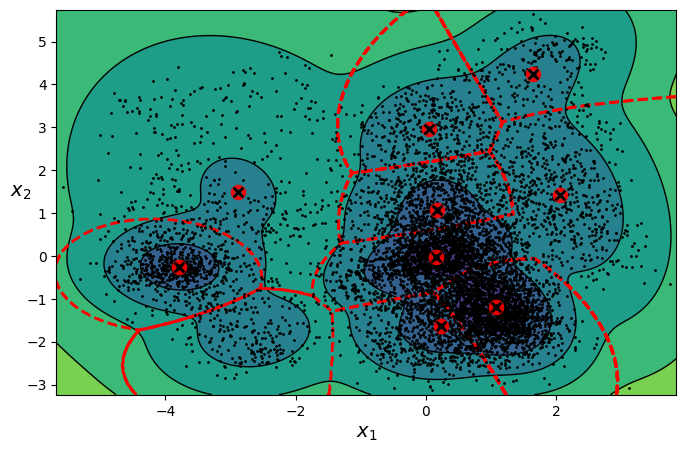

In [ ]:
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, X_train_reduced)
plt.show()